## 读取数据

##### 导入数据分析所需要的库，并通过Pandas的`read_csv`函数，将原始数据文件`Iris.csv`里的数据内容，解析为DataFrame并赋值给变量`original_data`。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("C:\\Users\\29335\\Desktop\\diabetes_prediction.csv")

original_data.head()

## 评估和清理数据

##### 在这一部分中，我们将对在上一部分建立的original_dataDataFrame所包含的数据进行评估和清理。

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

为了区分开经过清理的数据和原始的数据，我们创建新的变量cleaned_data，让它为original_data复制出的副本。我们之后的清理步骤都将被运用在cleaned_data上。

In [3]:
cleaned_data = original_data.copy()

### 数据整齐度

In [4]:
cleaned_data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


##### 从头部的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

### 数据干净度

##### 接下来通过`info`，对数据内容进行大致了解。

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


##### 从输出结果来看，cleaned_data共有100000条观察值，变量不存在缺失值。数据类型方面，我们已知gender(性别)、hypertension（是否患有高血压）、heart_disease（是否患有心脏病）、smoking_history（吸烟史）、diabetes（是否患有糖尿病）都是分类数据，可以把数据类型都转换为Category。



In [6]:
cleaned_data['gender'] = cleaned_data['gender'].astype('category')
cleaned_data['hypertension'] = cleaned_data['hypertension'].astype('category')
cleaned_data['heart_disease'] = cleaned_data['heart_disease'].astype('category')
cleaned_data['diabetes'] = cleaned_data['diabetes'].astype('category')
cleaned_data['smoking_history'] = cleaned_data['smoking_history'].astype('category')

In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   gender               100000 non-null  category
 1   age                  100000 non-null  float64 
 2   hypertension         100000 non-null  category
 3   heart_disease        100000 non-null  category
 4   smoking_history      100000 non-null  category
 5   bmi                  100000 non-null  float64 
 6   HbA1c_level          100000 non-null  float64 
 7   blood_glucose_level  100000 non-null  int64   
 8   diabetes             100000 non-null  category
dtypes: category(5), float64(3), int64(1)
memory usage: 3.5 MB


#### 处理缺失数据

##### 从`info`方法的输出结果来看，在cleaned_data`中，不存在缺失值。

#### 处理重复数据

##### 根据数据变量的含义以及内容来看，cleaned_data里的均允许重复，所以可以不进行重复数据的评估。

#### 处理不一致数据

##### 不一致数据可能存在于所有分类变量中，我们要查看是否存在不同值实际指代同一目标的情况。

In [8]:
cleaned_data["hypertension"].value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

In [9]:
cleaned_data["heart_disease"].value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

In [10]:
cleaned_data["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [11]:
cleaned_data["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [12]:
cleaned_data["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

##### 从以上输出结果来看，均不存在不一致数据。

#### 处理无效或错误数据

##### 可以通过DataFrame的`describe`方法，对数值统计信息进行快速了解。

In [13]:
cleaned_data.describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


##### 人口年龄平均为41岁左右，最大值为80岁，最小值为0.08岁。bmi身体质量指数平均27左右，最大值为95.69，最小值为10.01。HbA1c_level糖化血红蛋白水平平均5.5%左右，最大值为9.0%，最小值为3.5%。blood_glucose_level血糖水平平均为138左右，最大值为300，最小值为80。数据不存在脱离现实的数值。

## 探索数据

##### 在着手推断统计学分析之前，我们可以先借助数据可视化，探索变量的分布，以及与患有糖尿病存在相关性的变量，为后续的进一步分析提供方向。
我们可以利用该数据集探索各种医疗和人口统计因素与糖尿病的可能性之间的关系。

In [14]:
# 设置图表色盘为"pastel"
sns.set_palette("pastel")

In [15]:
# 设置图表尺寸
plt.rcParams["figure.figsize"] = [9.00, 3.50]
plt.rcParams["figure.autolayout"] = True

### 患糖尿病比例

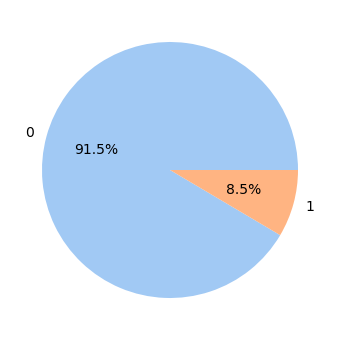

In [16]:
diabetes_count = cleaned_data['diabetes'].value_counts()
diabetes_label = diabetes_count.index
plt.pie(diabetes_count, labels=diabetes_label, autopct='%.1f%%')
plt.show()

##### 从以上饼图来看，患糖尿病的患者约占总人数的10%

### 人口年龄

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


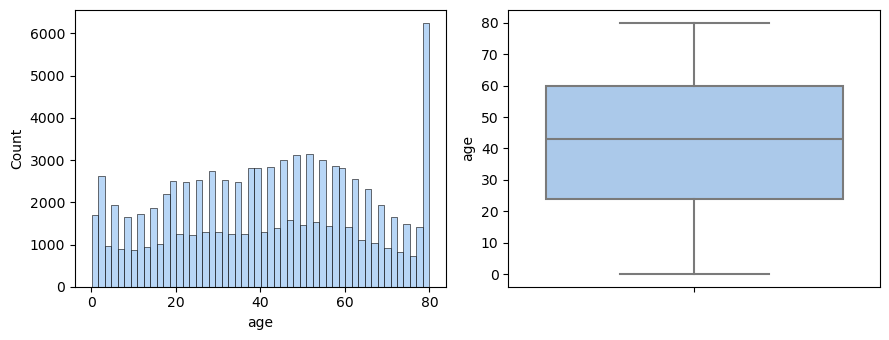

In [17]:
fig, axes = plt.subplots(1, 2)
sns.histplot(cleaned_data, x='age', ax=axes[0])
sns.boxplot(cleaned_data, y='age', ax=axes[1])
plt.show()

##### 人口年龄分布均匀。

### 人口年龄与是否患糖尿病

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


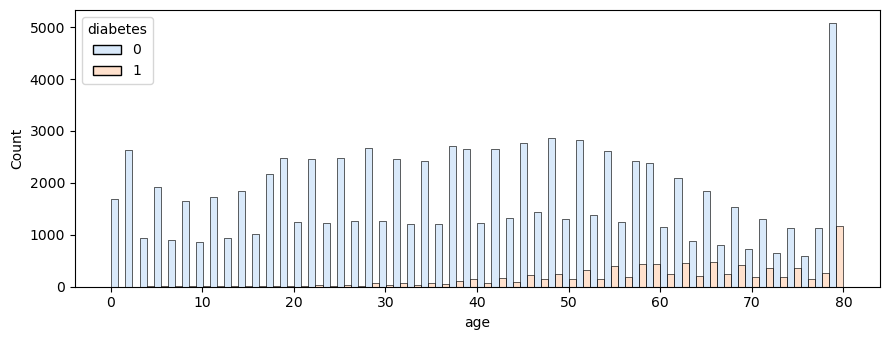

In [18]:
sns.histplot(data=cleaned_data, x='age', hue='diabetes', multiple='dodge', stat='count', alpha=0.4)
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


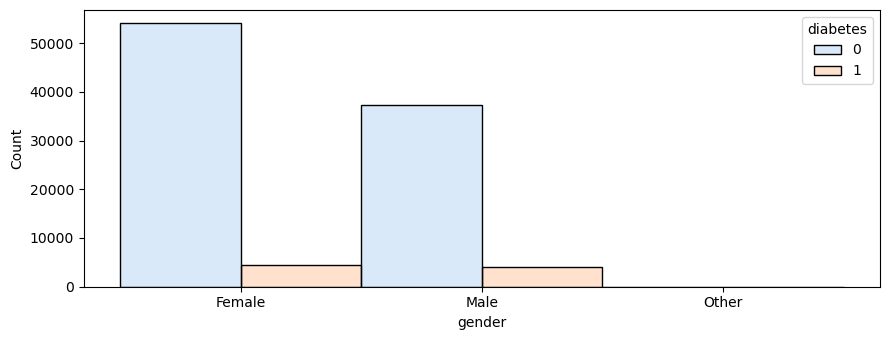

In [19]:
sns.histplot(data=cleaned_data, x='gender', hue='diabetes', multiple='dodge', stat='count', alpha=0.4)
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


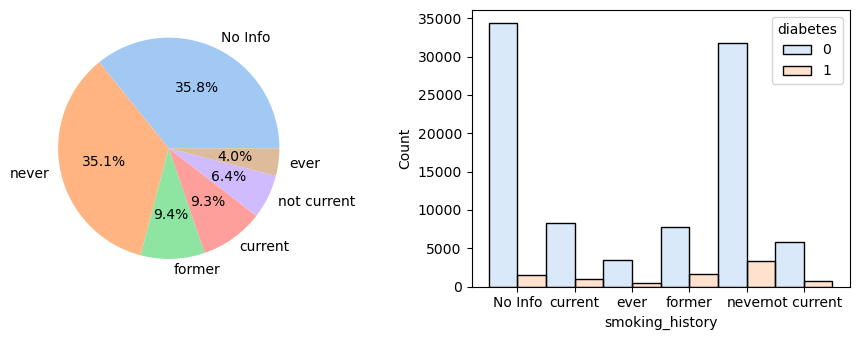

In [20]:
fig, axes = plt.subplots(1, 2)
smoking_history_count = cleaned_data['smoking_history'].value_counts()
smoking_history_label = smoking_history_count.index
axes[0].pie(smoking_history_count, labels=smoking_history_label,autopct='%.1f%%')
sns.histplot(cleaned_data, x='smoking_history', hue='diabetes',multiple='dodge', stat='count', alpha=0.4,ax=axes[1])
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


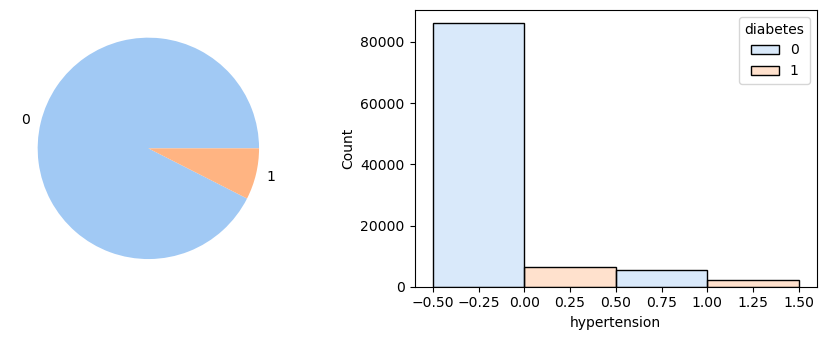

In [21]:
fig, axes = plt.subplots(1, 2)
hypertension_count = cleaned_data['hypertension'].value_counts()
hypertension_label = hypertension_count.index
axes[0].pie(hypertension_count, labels=hypertension_label)
sns.histplot(cleaned_data, x='hypertension', hue='diabetes',multiple='dodge', stat='count', alpha=0.4,ax=axes[1])
plt.show()

In [22]:
cleaned_data['hypertension']


0        0
1        0
2        0
3        0
4        1
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: hypertension, Length: 100000, dtype: category
Categories (2, int64): [0, 1]

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


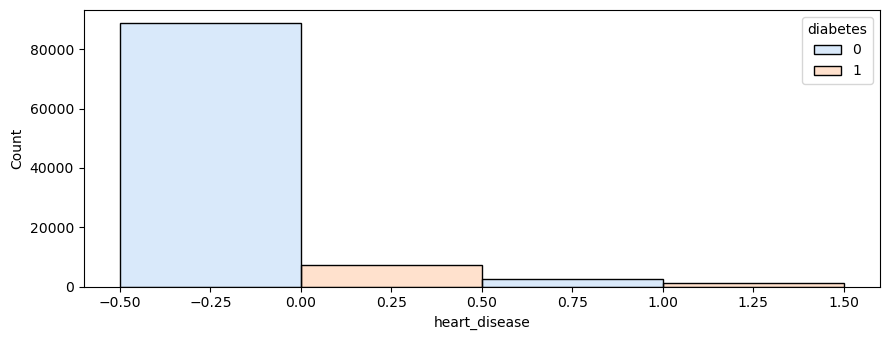

In [23]:
sns.histplot(cleaned_data, x='heart_disease', hue='diabetes',multiple='dodge', stat='count', alpha=0.4)
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


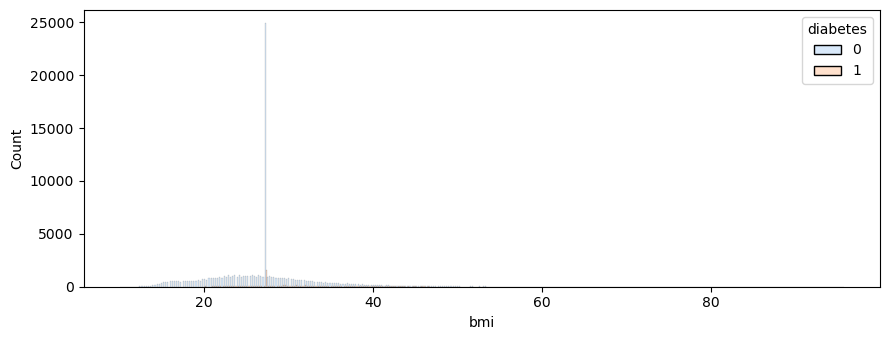

In [24]:

sns.histplot(cleaned_data, x='bmi', hue='diabetes',multiple='dodge', stat='count', alpha=0.4)
plt.show()

## 分析数据

##### 在分析步骤中，我们将利用以上清理后到的数据，进行逻辑回归分析，目标是得到一个可以根据患者的医疗和人口统计信息来预测糖尿病的数学模型。

我们先引入做逻辑回归所需的模块。

In [25]:
import statsmodels.api as sm

##### 然后可以创建一个新的DataFrame`lr_data`，让它作为我们进逻辑性回归分析所用的数据。

和`cleaned_data`区分开的原因是，我们在进行回归分析前，还可能需要对数据进行一些准备，比如引入虚拟变量，这些都可以在`lr_data`上执行。

In [26]:
lr_data = cleaned_data.copy()
lr_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


##### 由分析可得，以上变量均对人们是否患有糖尿病有影响，所以保留以上全部变量

##### 数据里还存在分类变量，无法直接建立逻辑回归模型。我们需要引入虚拟变量，也就是用0和1分别表示是否属于该类别。

In [27]:
lr_data = pd.get_dummies(lr_data, drop_first=True, columns=['gender','hypertension','heart_disease','smoking_history'],dtype=int)
lr_data.head()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,hypertension_1,heart_disease_1,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,25.19,6.6,140,0,0,0,0,1,0,0,0,1,0
1,54.0,27.32,6.6,80,0,0,0,0,0,0,0,0,0,0
2,28.0,27.32,5.7,158,0,1,0,0,0,0,0,0,1,0
3,36.0,23.45,5.0,155,0,0,0,0,0,1,0,0,0,0
4,76.0,20.14,4.8,155,0,1,0,1,1,1,0,0,0,0


In [28]:
lr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   age                          100000 non-null  float64 
 1   bmi                          100000 non-null  float64 
 2   HbA1c_level                  100000 non-null  float64 
 3   blood_glucose_level          100000 non-null  int64   
 4   diabetes                     100000 non-null  category
 5   gender_Male                  100000 non-null  int32   
 6   gender_Other                 100000 non-null  int32   
 7   hypertension_1               100000 non-null  int32   
 8   heart_disease_1              100000 non-null  int32   
 9   smoking_history_current      100000 non-null  int32   
 10  smoking_history_ever         100000 non-null  int32   
 11  smoking_history_former       100000 non-null  int32   
 12  smoking_history_never        100000 non-null 

##### 接下来，我们要把因变量和自变量划分出来。

因变量是`diabetes`变量，因为我们进行逻辑回归的目的，是根据患者的医疗和人口统计信息来预测患者得糖尿病的概率。

In [29]:
y = lr_data['diabetes']

##### 我们可以把除`diabetes`之外的先纳入自变量，但需要查看它们之间的相关性。如果其中有些变量之间相关性很高，会导致共线性。

In [30]:
X = lr_data.drop(['diabetes'], axis=1)
X.corr()

,age,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,hypertension_1,heart_disease_1,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
age,1.000000,0.337396,0.101354,0.110672,-0.030282,-0.007348,0.251171,0.233354,0.030946,0.065768,0.216481,0.065498,0.067663
bmi,0.337396,1.000000,0.082997,0.091261,-0.023021,0.000119,0.147666,0.061198,0.053617,0.044343,0.111312,0.086849,0.034979
HbA1c_level,0.101354,0.082997,1.000000,0.166733,0.020058,-0.001528,0.080939,0.067589,0.006123,0.009655,0.037306,0.010684,0.009830
blood_glucose_level,0.110672,0.091261,0.166733,1.000000,0.017189,0.000457,0.084429,0.070066,0.012447,0.006267,0.040688,0.012475,0.008613
gender_Male,-0.030282,-0.023021,0.020058,0.017189,1.000000,-0.011285,0.014423,0.077911,0.026636,0.010991,0.049048,-0.098547,-0.011985
gender_Other,-0.007348,0.000119,-0.001528,0.000457,-0.011285,1.000000,-0.003816,-0.002718,-0.004293,0.001062,-0.004310,-0.005181,0.020760
hypertension_1,0.251171,0.147666,0.080939,0.084429,0.014423,-0.003816,1.000000,0.121262,0.017930,0.023124,0.083401,0.045953,0.000997
heart_disease_1,0.233354,0.061198,0.067589,0.070066,0.077911,-0.002718,0.121262,1.000000,0.007604,0.040671,0.095194,-0.030843,0.007922
smoking_history_current,0.030946,0.053617,0.006123,0.012447,0.026636,-0.004293,0.017930,0.007604,1.000000,-0.065343,-0.102766,-0.235267,-0.083990
smoking_history_ever,0.065768,0.044343,0.009655,0.006267,0.010991,0.001062,0.023124,0.040671,-0.065343,1.000000,-0.065598,-0.150177,-0.053613


##### 一般我们认为，当相关系数的绝对值大于0.8的时候，可能导致严重共线性，所以我们检查的时候，找绝对值大于0.8的值即可。

In [31]:
X.corr().abs() > 0.8

,age,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,hypertension_1,heart_disease_1,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
age,True,False,False,False,False,False,False,False,False,False,False,False,False
bmi,False,True,False,False,False,False,False,False,False,False,False,False,False
HbA1c_level,False,False,True,False,False,False,False,False,False,False,False,False,False
blood_glucose_level,False,False,False,True,False,False,False,False,False,False,False,False,False
gender_Male,False,False,False,False,True,False,False,False,False,False,False,False,False
gender_Other,False,False,False,False,False,True,False,False,False,False,False,False,False
hypertension_1,False,False,False,False,False,False,True,False,False,False,False,False,False
heart_disease_1,False,False,False,False,False,False,False,True,False,False,False,False,False
smoking_history_current,False,False,False,False,False,False,False,False,True,False,False,False,False
smoking_history_ever,False,False,False,False,False,False,False,False,False,True,False,False,False


##### 从以上输出结果来看，绝对值没有大于0.8的，不会导致共线性问题。

##### 接下来，给模型的线性方程添加截距。

In [32]:
X = sm.add_constant(X)

##### 下一步就可以调用`Logit`函数，利用最大似然优化来得到逻辑回归模型的参数值，并输出总结信息。

In [33]:
model = sm.Logit(y, X)


##### 由于模型无法收敛，我们尝试增加迭代次数

In [34]:
# 尝试增加最大迭代次数
result = model.fit(maxiter=1000, start_params=[0] * X.shape[1])
result.summary()

         Current function value: 0.113137
         Iterations: 1000


D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               diabetes   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99986
Method:                           MLE   Df Model:                           13
Date:                Thu, 26 Sep 2024   Pseudo R-squ.:                  0.6110
Time:                        13:30:42   Log-Likelihood:                -11314.
converged:                      False   LL-Null:                       -29081.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -27.8151      0.294    -94.742      0.000     -28.390     -27.240
age                             0.0462      0.001     41.040      0.000       0.044       0.048
bmi                             0.0890      0.003     34.819      0.000       0.084       0.094
HbA1c_level                     2.3402      0.036     65.413      0.000       2.270       2.410
blood_glucose_level             0.0334      0.000     69.207      0.000       0.032       0.034
gender_Male                     0.2724      0.036      7.540      0.000       0.202       0.343
gender_Other                  -17.1968   8059.276     -0.002      0.998   -1.58e+04    1.58e+04
hypertension_1                  0.7413      0.047     15.737      0.000       0.649       0.834
heart_disease_1                 0.7346      0.061     12.099      0.000       0.616       0.854
smoking_history_current         0.7304      0.067     10.981      0.000       0.600       0.861
smoking_history_ever            0.6794      0.085      7.955      0.000       0.512       0.847
smoking_history_former          0.6220      0.060     10.405      0.000       0.505       0.739
smoking_history_never           0.5738      0.049     11.739      0.000       0.478       0.670
smoking_history_not current     0.5190      0.075      6.929      0.000       0.372       0.666
===============================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""